theta 0
theta 1
theta 2
theta 3
theta 4
theta 5
theta 6
theta 7
theta 8
theta 9


(0.0, 1.0)

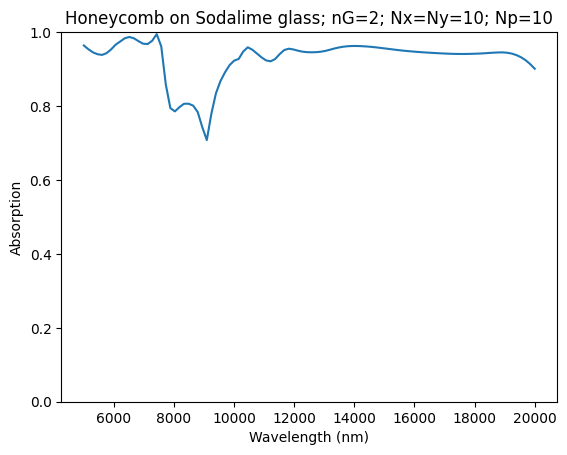

In [ ]:
from beads import beads
import numpy as np
import matplotlib.pyplot as plt
from refractiveindex import RefractiveIndexMaterial

SiO2 = RefractiveIndexMaterial(shelf='main', book='SiO2', page='Franta-25C')
HfO2 = RefractiveIndexMaterial(shelf='main', book='HfO2', page='Franta')
Ag = RefractiveIndexMaterial(shelf='main', book='Ag', page='Ciesielski')
Si = RefractiveIndexMaterial(shelf='main', book='Si', page='Franta-25C')
Ti = RefractiveIndexMaterial(shelf='main', book='Ti', page='Werner')
Ti_2 = RefractiveIndexMaterial(shelf='main', book='Ti', page='Ordal')
SodaLime = RefractiveIndexMaterial(shelf='glass', book='soda-lime', page='Rubin-IR')

# dev_structure = [
#     ('air',0.0,'slab'),
#     (SiO2,230,'slab'),
#     (HfO2,485,'slab'),
#     (SiO2,688,'slab'),
#     (HfO2,13,'slab'),
#     (SiO2,73,'slab'),
#     (HfO2,34,'slab'),
#     (SiO2,54,'slab'),
#     (Ag,200,'slab'),
#     (Ti_2,20,'slab'),
#     (Si,750,'slab'),
#     ('air',0.0,'slab')
# ]

wv_sweep = np.linspace(5000, 20000, num=100, endpoint=True) 

dev_structure = [
    ('air',0.0,'slab'), 
    (SiO2,8000,'honeycomb'), 
    (SodaLime,1000000,'slab'), 
    ('air',0.0,'slab') 
]

Rs, Ts, As = beads(wv_sweep, nG=2, theta_start=0, theta_end=80, n_theta=10, 
                   theta_sweep=True, Nx=10, Ny=10, Np=10, structure=dev_structure)

plt.plot(wv_sweep, As)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorption")
plt.title("Honeycomb on Sodalime glass; nG=2; Nx=Ny=10; Np=10")
plt.ylim(0, 1)